<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tutorial-1:-Recursive-Mappings-(Examples-and-Implementation)" data-toc-modified-id="Tutorial-1:-Recursive-Mappings-(Examples-and-Implementation)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tutorial 1: Recursive Mappings (Examples and Implementation)</a></span></li><li><span><a href="#Exercise-0" data-toc-modified-id="Exercise-0-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 0</a></span><ul class="toc-item"><li><span><a href="#Answers:" data-toc-modified-id="Answers:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Answers:</a></span></li><li><span><a href="#Answer-(continued):" data-toc-modified-id="Answer-(continued):-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Answer (<em>continued</em>):</a></span></li></ul></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 1</a></span><ul class="toc-item"><li><span><a href="#Answers:" data-toc-modified-id="Answers:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Answers:</a></span></li></ul></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2</a></span><ul class="toc-item"><li><span><a href="#Answers" data-toc-modified-id="Answers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Answers</a></span></li><li><span><a href="#Answers:" data-toc-modified-id="Answers:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Answers:</a></span></li></ul></li><li><span><a href="#For-the-movie-lover" data-toc-modified-id="For-the-movie-lover-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>For the movie lover</a></span></li></ul></div>

## Tutorial 1: Recursive Mappings (Examples and Implementation)

Author: [MachinaFantasma](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)


**Key Learning Points**


* Economics:
    * *Recursive competitive equilibrium* concept
    * Representation of dynamic competitive equilibrium as some mathematical operator
    * Fixed point of recursive map as *steady-state* equilibrium *point*
* Skills: Baptism by Fire or How to be a confident Pythonista
    * Lists and arrays
    * Some NumPy tricks
    * Root finding (scalar) using SciPy
    * Methods/functions
    * The `lambda` function
    * Programming Loops and relation to recursive economic equilibrium operator
    * Simulation and Graphical Visualization
    

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.mlab as mlab   # For plotting given distribution functions
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import cm

A major (technical) theme in modern macroeconomic theory is the idea of representing *dynamic economic phenomena* in a compact or tractable way. To do so, the goal is to find a *recursive representation* of the equilibrium of a dynamic economy. This task is true, whether we are dealing with a simple growth model economy, or, a more complicated dynamic economy where agents can behave strategically ([see e.g., my work here](https://doi.org/10.1016/j.jmateco.2016.03.004)).

What is a recursive mapping? Think of it as a machine which takes the current position of a particle, combines it with some other input or factor, and maps out the particle's location in the next instance. In a time-series statistics course or in our lecture notes, you'd have already seen an example of a dynamic (and stochastic) model which has a recursive map---the AR(1) model:
$$Y_{t+1} = \rho Y_{t} + \sigma W_{t+1},$$
where $W_{t} \sim N(0,1)$, $\rho \in (0,1)$ and $\sigma \in (0,\infty)$. According to this mapping, the current state $Y_{t}$ together with a realization for the random variable $W_{t+1}$, will produce the realization of the random state $Y_{t+1}$ next period.

Econometricians call this a *reduced-form* statistical model. It is reduced-form in the sense that there is no deeper economic structure underpinning the law of motion above. We shall see how economic theory can provide a structural (and causal) mechanism that would rationalize a stochastic process such as this.

NB: Later we'll also encounter more general forms of recursive maps, where the domain and co-domain of these maps are function spaces. This will appear in our model applications either in the forms of Bellman or Euler (functional) equations. Solving these recursive maps mean that we can solve for equilibrium allocation or decision rules. These rules are what control the equilibrium evolution of our model economies.  

## Exercise 0

Let's go back to a familiar economic theory of growth: the Solow-Swan model. A closed economy has a per-worker production technology that takes per-worker capital $k_t$ available at the beginning of date $t$ and produces $y_{t} = A_{t}k_{t}^{\alpha}$ units of output per worker. The variable $A_{t}$ is exogenous technology that follows some law of motion. The parameter $\alpha \in (0,1)$ is known as the (Cobb-Douglas) share of capital income in total income of the economy. 

Capital per worker evolves according to the technology:
$$
k_{t+1} = (1-\delta)k_{t} + s y_{t}. 
$$
This says that (per-worker) capital available for use next period is a combination of undepreciated per-worker capital at the end of this period, and new savings flow. The parameters $\delta \in [0,1]$ and $s \in (0,1)$ are, respectively, the rate of depreciation of capital and the savings rate.
1. Show that a dynamic equilibrium of this model has a recursive structure.
3. Calculate a constant (steady-state) value $k > 0$ such that it satisfies the dynamic equilibrium condition of the model. What do we call this constant $k > 0$?  
3. Assume that $A_t = 1$, a constant, $\alpha = 0.33$, $s = 0.20$, and $\delta = 0.10$. Plot the graphs of $\{ (k, h(k)) \in \mathbb{R}_{+}^{2} : h(k) := (1-\delta) k + sk^{\alpha}\}$ and $\{(k,z(k)) \in \mathbb{R}_{+}^{2} : z(k) = k\}$ in $(k_{t},k_{t+1})$-space. Now plot the trajectory of the economy beginning from an arbitrary initial state, say $k_{0} = 0.01$ in the same diagram, for sufficiently long. Comment on your result.

### Answers:
1. Plug the expression of the production function $y=Ak^{\alpha}$ into the capital accumulation technology to get
$$
    k_{t+1} = (1-\delta)k_{t} + s  A_{t}k_{t}^{\alpha}
$$
Note: Given exogenous process for $A_{t}$, we have a recursive map in terms of $k$.

2. Note, a steady state $k^{ss}$ is a point in $\mathbb{R}_{+}$ such that $k_{t+1} = k_{t} = k^{ss}$. So here, $k^{ss}$ solves:
$$
    \delta k^{ss} = s A\left( k^{ss} \right)^{\alpha}.
$$
Note $k^{ss} = 0$ is a fixed-point solution as well. But this implies a zero production steady state, so it is not interesting to us for now. Let's focus on the solution $k^{ss} = (sA/\delta)^{1/(1-\alpha)}$. 

Below, we demonstrate two ways to solve for $k^{ss}$: 

**Option 1**: This is a simple analytic model, so we could solve for $k^{ss}$ by hand, given the parameters of the model. This is done as Option 1 in the code segment below. 

In [2]:
# Parameters
ALPHA = 0.33
DELTA = 0.1
SAVRATE = 0.2
RHO = 0.80
SIGMA = 0.05
A = 1.0
g = 0.0       # TFP growth rate
n = 0.00       # Population growth rate

# Option 1: Analytical deterministic (nontrivial) steady state
discount = (1.0+n)*(1.0+g)-(1.0-DELTA)
kss = (SAVRATE*A/discount)**(1.0/(1.0-ALPHA))
print("Nontrivial steady state, kss = " + str(kss))

Nontrivial steady state, kss = 2.8138341814776537


**Option 2**: In some cases, a solution for something like $k^{ss}$ may not be obtained analytically. If so, we could use numerical approximation. Option 2 in the code snippet below provides such an example usage. First, define the change function $g(k):=s \left( k \right)^{\alpha} -\delta k$. Note the economic interpretation here: *The value of $g$ at $k$, says that, the change in capital from today to tomorrow is caused by excess saving (capital deepening) over capital depreciation (shallowing)*. 

So, a steady state point, $k^{ss}$, is one where the change in capital stock is zero. Mathematically, and numerically, we seek a $k^{ss}$ such that $g(k^{ss}) = 0$. That is, we want to "find the zero of the function $g$". Since, in our example here, $g$ is a continuous function and if we assume a bounded domain, then we are guaranteed that there is at least one such zero, but there could be more. (In fact there are two!) But since we are interested in the non-trivial steady state, we will set the lower bound of the domain of $g$ to be a very small positive number to exclude the point $k = 0$. 

To implement this idea in Python, we can use a simple root finding algorithm like the [Secant Method](https://en.wikipedia.org/wiki/Secant_method) or [Bisection Method](https://en.wikipedia.org/wiki/Bisection_method). Here I use a hybrid method called [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method) that is guaranteed to work. (The famous Richard Brent was here at ANU's MSI for some time.) Note that, these root-finding algorithms are local methods, i.e., they find only one of potentially many roots (or zeros) depending on where the algorithm starts off on its search. Fortunately, our continuous function $g$ is monotone, so it cuts zero only once. (Here's an example where getting to know the theoretical properties of your model before jumping to using numerical methods is a very important and useful skill to put to use. Here's a [nice empirical paper](http://people.hss.caltech.edu/~mshum/stats/rust.pdf).)

In [3]:
# Option 2: Numerical: Solve for k s.t. g(k) := sk^alpha - dk = 0

# Here we use SCIPY/Brent's root finding algorithm

# Define the two functions that characterized a steady state solution from earlier
# using the lambda function (see, e.g.,: http://www.secnetix.de/olli/Python/lambda_functions.hawk)
deepen_k = lambda x: SAVRATE*A*x**ALPHA
shallow_k = lambda x: (g+n+DELTA)*x

# Or, the composite of the two ... the excess saving function
gk = lambda x: SAVRATE*A*x**ALPHA - discount*x

# Numerical lower and upper bounds on k
kmin = 0.0
kmax = kss*1.3

# Root of gk(k) = 0 function using Brent's root-finding algorithm (function must be continuous)
kss_numerical = opt.brentq(gk, kmin + 0.001, kmax,
                    args=(), xtol=1e-12,    
                    rtol=4.4408920985006262e-12, maxiter=100, 
                    full_output=True, disp=True) 

# Check Options 1 and 2 produce same result
print("Analytical: Steady state per-capita capital, kss = " + str(kss))
print("Brent's Method: Steady state (effective) per-capita capital, kss_numerical = " + str(kss_numerical[0]))


Analytical: Steady state per-capita capital, kss = 2.8138341814776537
Brent's Method: Steady state (effective) per-capita capital, kss_numerical = 2.81383418147765


*Note:* We snuck in a new Pythonic skill above. Did you notice the *lambda* functions? These are examples of using Python's method of creating anonymous functions (i.e., functions on the fly) that are not bound to a specific function name (which we learned to create last week by using **def** .)

Text(0, 0.5, 'saving, depreciation, output')

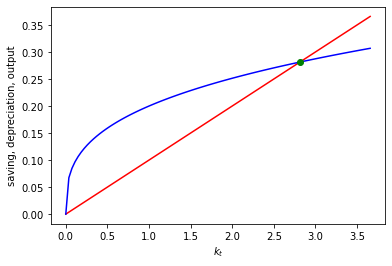

In [4]:
# Plot graphs of dk and sk^alpha
k_set = np.linspace(kmin, kmax, 100)
shallow = shallow_k(k_set)
deepen = deepen_k(k_set)
plt.plot(k_set, shallow, 'r-',          # graph of saving function
         k_set, deepen, 'b-',           # graph of depreciate function
         kss, shallow_k(kss), 'go')     # steady state point
plt.xlabel('$k_{t}$')
plt.ylabel('saving, depreciation, output')

### Answer (*continued*):

3 . In this special case where $A_{t} = 1$ always and everywhere, we have
$$ 
    k_{t+1} = (1-\delta)k_{t} + s  k_{t}^{\alpha}.
$$
This is an example you can find in most undergraduate macroeconomics textbooks.

OK, now we plot a different diagram, called a *phase diagram* (NB: That's cool name, in a Trekkie-geek sort of way). This is useful since we can see how $k_{t}$ today maps into $k_{t+1}$ tomorrow. (In other words, we can visualize how the state of our simple model economy evolves relative to its most recent past.) So let us define another function $h$ on the fly, where $h(k) := (1-\delta)k_{t} + s  k_{t}^{\alpha}$.

Text(0, 0.5, '$k_{t+1}$')

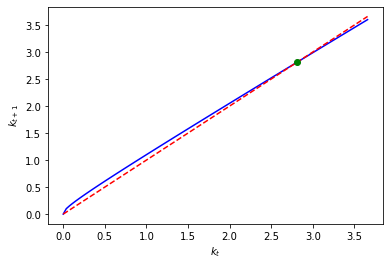

In [5]:
h = lambda x: ((1-DELTA)*x + SAVRATE*A*x**ALPHA)/((1.0+g)*(1.0+n))

# Plot the phase diagram:
plt.plot(k_set, h(k_set), 'b-', # the recursive mapping h
         k_set, k_set, 'r--',   # 45-degree line
         kss, kss, 'go')        # steady state point
plt.xlabel('$k_{t}$')
plt.ylabel('$k_{t+1}$')

OK, suppose we begin observing this Solow-Swan economy at date $t=0$ with initial state $k_{0} = 0.01$. Let apply the recursive (equilibrium) map of Solow-Swan here to solve for the sequence of equilibrium *outcomes* beginning from $k_{0}$. Let's put our skill of constructing loops to good use again. (Note: This time, we have already defined the equilibrium mapping $h$ so we don't have to hard-wire its definition into the loop below!)

In [6]:
# Simulate equilibrium path
T = 80
k = np.empty(T)                 # Effective per-capita capital, k
A_initial = A                   # TFP at date 0
ktrend = k.copy()               # Per-capita capital, k*A
kbgp = k.copy()
k[0] = 0.01                     # Initial state
ktrend[0] = k[0]*A_initial
kbgp[0] = kss
kbgp[1] = kss*(1.0+g)
for t in range(T-1):
    k[t+1] = h(k[t])
    trend = A_initial*(1.0+g)**(t+1)
    ktrend[t+1] = k[t+1]*trend
    kbgp[t+1] = kbgp[t+1]*trend

So, here's what the dynamic equilibrium outcome looks like in the phase diagram:

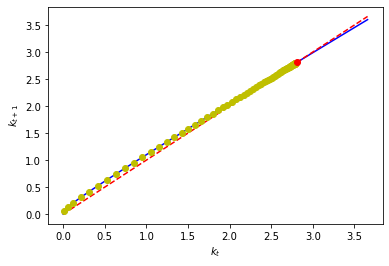

In [7]:
# Plot the phase diagram:
plt.plot(k_set, h(k_set), 'b-',  # the recursive mapping h
         k_set, k_set, 'r--')    # 45-degree line
         
plt.plot(k[0:-2], k[1:-1], 'oy') # Equilibrium path
plt.plot(kss, kss, 'ro')         # steady state point
plt.xlabel('$k_{t}$')
plt.ylabel('$k_{t+1}$')
plt.show()

In the source folder for the Python code to this notebook, there is an animated (MPEG-4) version of this figure to give you a live experience of how the state kt of this economy evolves and converges toward the steady state. 

Another way to visualize this is to plot the time path of this equilibrium outcome:

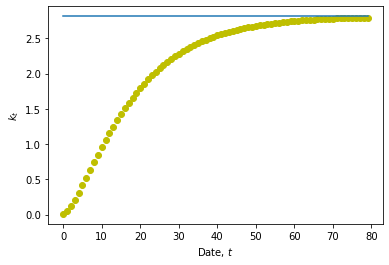

In [8]:
plt.plot(np.arange(k.size), k, 'yo', clip_on=False) # Equilibrium path
plt.plot(np.arange(k.size), kss*np.ones(k.size), clip_on=False) # Steady state point
plt.xlabel('Date, $t$')
plt.ylabel('$k_{t}$')
plt.show()

Comment: The Solow-Swan example here has an equilibrium map $k_{t} \mapsto h(k_{t})$. that is strictly concave in $k_{t}$. This, if you recall, is an artefact of the property of the production function itself, which exhibits the law of diminishing returns to capital. This property implies that an economy far away from its steady state equilibrium will be growing faster but that growth rate converges monotonically to zero as it approaches the steady state.

Now if there is trend growth in TFP, then per-capita variables will exhibit growth too, into the long run. To demonstrate this, we plot the trending per-capita variables below:

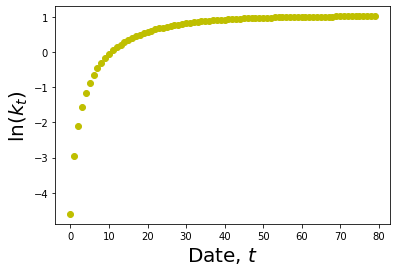

You have set g = 0 so there is no growth in the long run!


In [9]:
fig2 = plt.figure(facecolor='white') # Optimal Consumption function
plt.plot(np.arange(ktrend.size), np.log(ktrend), 'yo',clip_on=False) # Equilibrium path
plt.xlabel('Date, $t$',fontsize=20)
plt.ylabel('$\ln(k_{t})$',fontsize=20)

plt.show()

if (g == 0.0):
    print('You have set g = 0 so there is no growth in the long run!')

## Exercise 1

Let's practice [more chops](http://mikefury.net/wp-content/uploads/2014/11/bruce.jpg) with the reduced-form AR(1) model. 
1. Derive the impulse response or infinite moving-average representation of this model. Interpret your result.
2. Suppose $Y_{0} = 0$, $W_{0} = 1$, and $W_{t} = 0$ for all $t > 0$. Write a Python function for plotting the sequence $\{Y_{t}\}_{t=0}^{T}$, where $T = 30$. Assume $\rho = 0.80$ and $\sigma = 0.05$.
3. Now adapt your function from Step 2 above for simulating a very long series of realizations of $Y_{t}$. Plot the histogram of your sample. Comment on your result.

### Answers:
1. Use recursive backward subsitution. The date $t \geq 1$ impulse response function of this model is:
$$
    Y_{t} = \rho^{k}Y_{t-k} + \sigma\sum_{j=0}^{k-1}\rho^{j}w_{t-j}
$$
For example, the marginal impact of a shock in date-$1$ on the variable $Y_{2}$ is $\sigma \times \rho$, holding all else constant. More generally, for this model we have:
$$
    \frac{\partial Y_{t}}{\partial w_{t-j}} = \sigma \times \rho^{j}.
$$
Observe that $\rho \in (0,1)$ here governs how lasting a particular period's shock is on the future outcome of the state variable $Y$.
So, as history lengthens indefinitely, $k \nearrow \infty$, the term $\lim_{k \rightarrow \infty}\left(\rho^{k}Y_{t-k} \right) = 0$, and we have that the date $t$ state, $Y_{t}$, is an infinite moving average of past and current shocks:
$$
    Y_{t} = \sigma\sum_{j=0}^{\infty}\rho^{j}w_{t-j}.
$$
Note that the influence of a shock from the past, $w_{t-j}$, on $Y_{t}$, decays by the factor of $\rho^{j} \in (0,1)$. 

2. See last tutorial solution.

3. Repeat Step 2 for $T \nearrow \infty$. Theoretically, since the shocks are Gaussian, the long-run distribution of the stochastic process is also Gaussian. In fact, its unconditional distribution is $N(0, \sigma^{2}/(1-\rho^{2})$. Let's plot the empirical distribution of the sample of $\{Y_{t}\}_{t=0}^{T}$, as we take $T \nearrow \infty$. 

Code-wise, we can construct the impulse response function recursive, as you had done by hand above:

In [10]:
def simulate_ar1(RHO, SIGMA, T=30, simulation="stochastic", DateShock=1, ShockUnit=1.0):
    """Define AR(1) simulation method.
       
       Parameters
       ----------
       RHO: float64
           Persistence coefficient
       SIGMA: float64
           Std deviation of i.i.d. Gaussian shock 
       T: int
           Length of trajectory (including date t=0)
       simulation: str
           Default "stochastic"; "deterministic" for deterministic impulse(s)
       DateShock: int (or list of ints)
           Specify timing of deterministic impulse
       ShockUnit: float64
           (Default is one s.d.: SIGMA). Scale it as you like
    """
    print("Message from SIMULATE_AR1:\n")
    if simulation == "stochastic":
        print("\t0. Stochastic simulation chosen: default is 1 s.d. shock")
        w = np.random.randn(T)
    elif simulation == "deterministic":
        print("\t1. Deterministic Impulse Response chosen: default is 1 s.d. shock")
        print("\t2. If you want a 1 unit y-shock, set ShockUnit = 1.0/SIGMA\n")
        w = np.zeros(T)
        w[DateShock] = ShockUnit            
    y = np.zeros(T) # Pre-allocate memory space
    y[0] = 0.0
    for t in np.arange(T-1):
        y[t+1] = RHO*y[t] + SIGMA*w[t+1]
    return y, w

Now we answer part 2:

In [11]:
# Set stat model's parameters
RHO, SIGMA = 0.8, 0.05

# Construct IRF from date t=1 shock of size SIGMA
yirf, w = simulate_ar1(RHO, SIGMA, simulation="deterministic")

Message from SIMULATE_AR1:

	1. Deterministic Impulse Response chosen: default is 1 s.d. shock
	2. If you want a 1 unit y-shock, set ShockUnit = 1.0/SIGMA



Let's visualize the time path of the date $t=1$ shock:

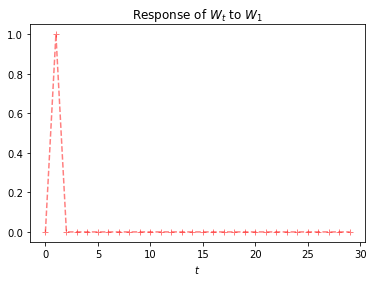

In [12]:
# Visualize it
plt.plot(np.arange(w.size), w, '+--r', alpha=0.5)
plt.title('Response of $W_{t}$ to $W_{1}$')
plt.xlabel('$t$')
plt.show()

Now we plot the impulse response function:

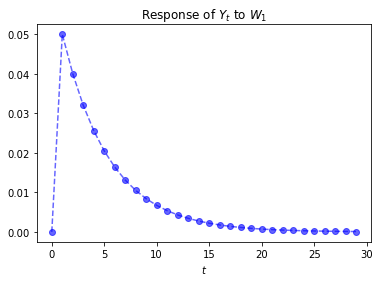

In [13]:
# Visualize it
plt.plot(np.arange(w.size), yirf, 'o--b', alpha =0.6)
plt.title('Response of $Y_{t}$ to $W_{1}$')
plt.xlabel('$t$')
plt.show()

Now we answer part 3 by reusing the same simulate_ar1 method we defined above. You just need to change the simulation to be a ``stochastic`` one:

In [14]:
# Construct IRF from date t=1 shock of size SIGMA
ymonty, w = simulate_ar1(RHO, SIGMA, T=10000, simulation="stochastic")

Message from SIMULATE_AR1:

	0. Stochastic simulation chosen: default is 1 s.d. shock


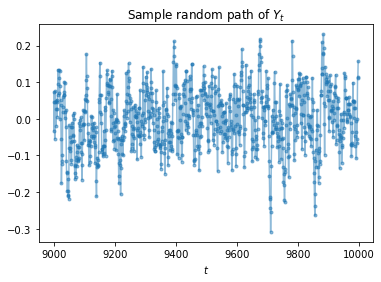

In [15]:
# Visualize it
plt.plot(np.arange(ymonty.size)[9000:-1], ymonty[9000:-1], '.-', alpha=0.5)
plt.title('Sample random path of $Y_{t}$')
plt.xlabel('$t$')
plt.show()

It turns out, the empirical distribution of the random path of $Y_t$ will converge to a Gaussian distribution in the long run. Let's visualize this distribution of sample realizations: 

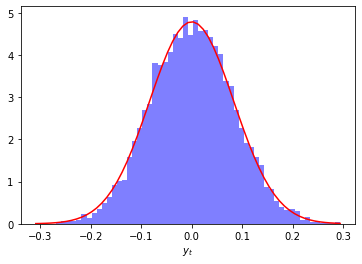

In [16]:
# histogram of the data ymonty:
nbins = 60
n, bins, patches = plt.hist(ymonty, nbins, 
                            density=True, 
                            facecolor='blue', 
                            alpha=0.5)

# pdf of theoretical stationary distribution of y:
MU = 0.0/(1.0-RHO)
ypop = stats.norm.pdf(bins, MU, np.sqrt(SIGMA**2.0 / (1.0 - RHO**2.0)))
plt.plot(bins, ypop, 'r-')
plt.xlabel('$y_{t}$')

plt.show()

## Exercise 2
Let's reconsider the Solow-Swan example in Exercise 0 again. For simplicity, let's assume $\delta = 0$.
1. Now suppose that $\ln(A_{t})$ follows the parametric instance of the AR(1) model from Exercise 0 above. Derive the dynamic equilibrium condition of this stochastic version of the Solow-Swan model.
2. Simulate a sample of length $T = 200$ outcomes of the random variable $A_{t}$. 
3. Plot the graphs of $\delta k$ and a the graph of $sA_{ss}k^{\alpha}$ in $(k_{t},k_{t+1})$-space, where $A_{ss} = 1$ (the non-stochastic steady-state of $A_{t}$. (Note that for each realization of $A_{t} \neq A_{ss}$ there is a corresponding graph of a production function.) Plot the path of $k_{t}$ for a sufficiently long sample size of your choosing.
4. Comment on your results.

### Answers

1. A competitive equilibrium in this model, beginning from a given initial state vector $(k_{0},A_{0})$, and given exogenous stochastic process $\{A_{t+1}\}_{t=0}^{\infty}$, is a sequence of random variables $\{k_{t+1}\}_{t=0}^{\infty}$ that satisfies the equilibrium map $k_{t+1} = h(A_{t}, k_{t})$.

2. We could just borrow the result from earlier and truncate the same of to the desired length to get a sample of $\{A_{t+1}\}_{t=0}^{T-1}$.

3. We'll re-use the codes from above too. But for illustrative purposes, I'm going to reset $\sigma$ to a bigger number below to scale up the noisiness of the AR(1) shock to technology (or total factor productivity) in this random Solow-Swan model:

In [17]:
# Define the equilibrium recursive map, h
def h_stochastic(A, k):
    """The recursive equilibrium map of a Solow example
    
    Parameters
    ----------
    A: float64, array_like
        Array or scalar of TFP shock(s)
    k: float64, array_like
        Array or scalar of capital stock(s)
    """
    return((1-DELTA)*k + SAVRATE*A*k**ALPHA)

Define model parameters and experiment-settings:

In [18]:
# Parameters
ALPHA = 0.33
DELTA = 0.1
SAVRATE = 0.2
RHO = 0.80
SIGMA = 0.05
A = 1.0

# Experiment parameters
T = 150

# Numerical lower and upper bounds on k
kss = (SAVRATE*A/DELTA)**(1.0/(1.0-ALPHA))
print("Nontrivial steady state, kss = " + str(kss))
kmin = 0.0
kmax = kss*1.3
k_set = np.linspace(kmin, kmax, 100)

Nontrivial steady state, kss = 2.813834181477653


Message from SIMULATE_AR1:

	0. Stochastic simulation chosen: default is 1 s.d. shock


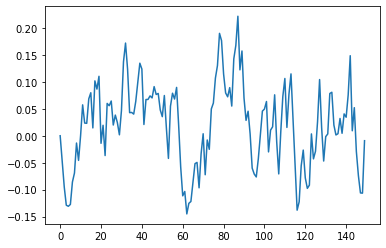

In [19]:
# Generate AR(1) shocks, a(t) := log(A(t))
a, w = simulate_ar1(RHO, SIGMA, T=T, simulation="stochastic")
plt.plot(a)
plt.show()

Now we sample the stochastic equilibrium path:

In [20]:
def rcepath_stochsolow():
    # Preliminaries-reserving memory space
    k = np.zeros((T+1,1))
    k[0] = 0.01
    # Figure
    fig = plt.figure(facecolor='white')
    ax = plt.axes(xlim=(k_set.min(), k_set.max()), ylim=(k_set.min(), k_set.max()))
    # Plot the phase diagram:
    ax.plot(k_set, h_stochastic(1.0, k_set), 'b-', # the recursive mapping h at A(t) = 1 forever
             k_set, k_set, 'r--',   # 45-degree line
             kss, kss, 'go')        # steady state point
    # Deterministic steady state point
    ax.plot(kss*np.tile(1,10), np.linspace(0.0, kss, 10), 'g-', 
            np.linspace(0.0, kss, 10), kss*np.tile(1,10), 'g-', 
            alpha=0.2, lw=1)
    plt.xlabel('$k_{t}$')
    plt.ylabel('$k_{t+1}$')
    # Loop---recursive equilibrium outcome generation
    for t in range(T):
        k[t+1] = h_stochastic( np.exp(a[t]), k[t] )
        ax.plot(k[t],k[t+1], 'o')
        if T <= 50:
            ax.annotate(str(t), xy=(k[t], k[t+1]), xytext=(k[t], k[t+1]))
    plt.show()
    
    return k

Here's an instance of using the above function:

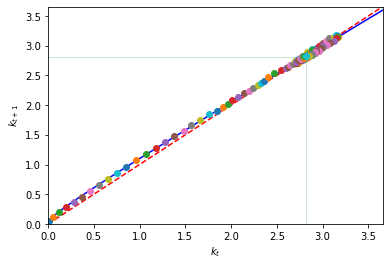

In [21]:
k_rcepath = rcepath_stochsolow()

Comment: Questions to ask yourself ...

1. Why are some of these realizations not on the blue graph? What does it mean?

2. Is there a tendency of the random sample above to eventually "stabilize" around  $k_{ss} >0$? (Hint: try setting  T  to a very large number in your stochastic simulations.)

3. What happens if  $k_0 = 0$?

Note: If  $\delta=1$  the recursive map  $h$  becomes  $h(A,k)=sAk^{\alpha}$ . If we take logs, then the process  ${\ln(k_t)}$  is Gaussian since  $\ln(A_t)$  is Gaussian. (The sum of Gaussian r.v.'s is Gaussian.)

Observe that the random outcome of  $k_{t}$  over time fluctuates around the deterministic steady-state equilibrium map (i.e., same graph from previous exercise with no shocks), as  $T \rightarrow \infty$. Because of shocks $A_{t}$  to the production function every period, the long run of this economy no longer settles on a single deterministic steady state point. But it appears that the long run stochastic dynamics will be distributed around the deterministic steady state according to some fixed distribution.

*Hint*: Re-run the code segment above, experimenting with  $T = 20$, $T = 100$, $T = 200$, and etc. What do you observe?

In fact, as a special case, consider  $\delta = 1$. Then can you prove that if the underlying shock (in logarithms) is Gaussian, then the long run distribution of  $\ln(k)$ is also Normal?

### Answers:
We leave this to the keen student as an exercise.

## For the movie lover

This section below re-does the above and renders the results in a video. You will need to execute and view this in a Jupyter Notebook launched locally on your machine (e.g., the Anaconda distribution you have installed). This won't work on the Azure cloud notebook. Also, you need to have the FFMEG video decoder installed on your computer.

In [22]:
# Render as video
def anime_rcepath_stochsolow(k):
    fig, ax = plt.subplots()
    def init():
        kub = kmax*2.0
        kset = np.linspace(0.0, kub, 100)
        ax.set_xlim(0.0, kmax*1.2)
        ax.set_ylim(0.0, kmax*1.2)
        # the recursive mapping h at A(t) = 1 forever
        ax.plot(kset, h_stochastic(1.0, kset), 'b-', 
             kset, kset, 'r--',   # 45-degree line
             kss, kss, 'go')        # steady state point
        # Deterministic steady state point
        ax.plot(kss*np.tile(1,10), np.linspace(0.0, kss, 10), 'g-', 
                np.linspace(0.0, kss, 10), kss*np.tile(1,10), 'g-', 
                alpha=0.2, lw=1)

    def PlanktonComesAlive(frame):
        ax.plot(k[frame], k[frame+1], 'o', c=cm.jet(np.random.rand()), alpha=0.75)

    anime = FuncAnimation(fig, PlanktonComesAlive, frames = T,
                        init_func=init, interval=100, repeat=True)
    return anime

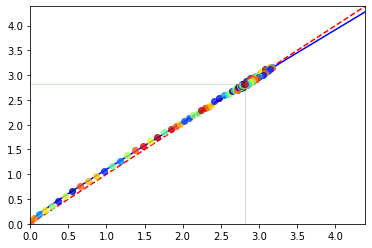

In [23]:
# Process and render video
ani = anime_rcepath_stochsolow(k_rcepath)
HTML(ani.to_html5_video())